In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
!ls drive/MyDrive

 Clean
'Coinbase - SWE Internships.pdf'
'Colab Notebooks'
'Copy of DeshpandeShardul+Shriniwas5182021TaxDocs.pdf'
'CPT Letter - Shardul Deshpande (AP).pdf'
'CSE 258 Group Assignment 2 Report Draft.gdoc'
'CSE MS career integrity pledge.pdf'
 dataset
 DeshpandeShardul+Shriniwas5182021TaxDocs.pdf
'Getting started.pdf'
 Glacier
 HBO
'IARPA UI Tasks.gsheet'
 image0.png
'Interview prep material'
'Interview prep material (1)'
'Ketogenic Diet Meal Planner.gsheet'
'MGTF415: Collect Analyze Financial Data (Reher)--MF22 - Remote Student List.gform'
'MGTF415: Collect Analyze Financial Data (Reher)--MF22 - Remote Student List (Responses).gsheet'
 MidTerm.gdoc
 printdocs
'Python GUI Project.gdoc'
'Section 2 (evening) Slide Decks Latest.zip'
'Section 2 (evening) Slide Decks.zip'
 ShardulDeshpandeSchedule.pdf
'Shardul Shriniwas Deshpande - Offer Letter - 20048717_encrypted_ (1).pdf'
'Shardul Shriniwas Deshpande - Offer Letter - 20048717_encrypted_.pdf'
 shardul-transcripts-with-degree-certificate.pdf
 

In [ ]:
df = pd.read_csv('drive/MyDrive/dataset/ml-100k/u.item', sep='|', index_col=False,encoding='latin-1', names=['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure','Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',  'Horror', 'Musical','Mystery', 'Romance','Sci-Fi','Thriller', 'War', 'Western'])
df = df.set_index('movie id')
df

,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 1 to 1682
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie title         1682 non-null   object 
 1   release date        1681 non-null   object 
 2   video release date  0 non-null      float64
 3   IMDb URL            1679 non-null   object 
 4   unknown             1682 non-null   int64  
 5   Action              1682 non-null   int64  
 6   Adventure           1682 non-null   int64  
 7   Animation           1682 non-null   int64  
 8   Children's          1682 non-null   int64  
 9   Comedy              1682 non-null   int64  
 10  Crime               1682 non-null   int64  
 11  Documentary         1682 non-null   int64  
 12  Drama               1682 non-null   int64  
 13  Fantasy             1682 non-null   int64  
 14  Film-Noir           1682 non-null   int64  
 15  Horror              1682 non-null   int64  
 16  Musica

In [ ]:
from collections import defaultdict
genres = ['unknown', 'Action', 'Adventure','Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',  'Horror', 'Musical','Mystery', 'Romance','Sci-Fi','Thriller', 'War', 'Western']
genre_cnt = defaultdict(int)
for ge in genres:
    genre_cnt[ge] = (df[ge] == 1).sum()
genre_cnt

defaultdict(int,
            {'Action': 251,
             'Adventure': 135,
             'Animation': 42,
             "Children's": 122,
             'Comedy': 505,
             'Crime': 109,
             'Documentary': 50,
             'Drama': 725,
             'Fantasy': 22,
             'Film-Noir': 24,
             'Horror': 92,
             'Musical': 56,
             'Mystery': 61,
             'Romance': 247,
             'Sci-Fi': 101,
             'Thriller': 251,
             'War': 71,
             'Western': 27,
             'unknown': 2})

In [ ]:
genre_cnt = dict(sorted(genre_cnt.items(), key=lambda item: item[1]))

## EDA


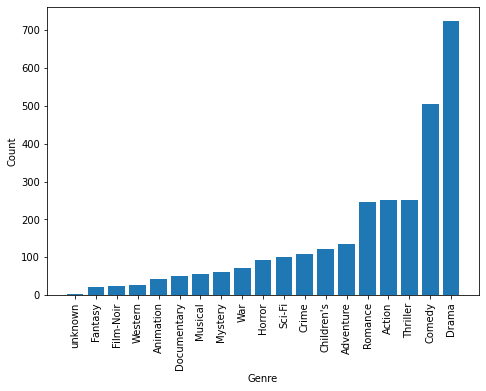

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = genre_cnt.keys()
students = genre_cnt.values()
ax.bar(langs,students)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['release year'] = pd.DatetimeIndex(df['release date']).year

In [ ]:
release_year_dict = df['release year'].value_counts().to_dict()

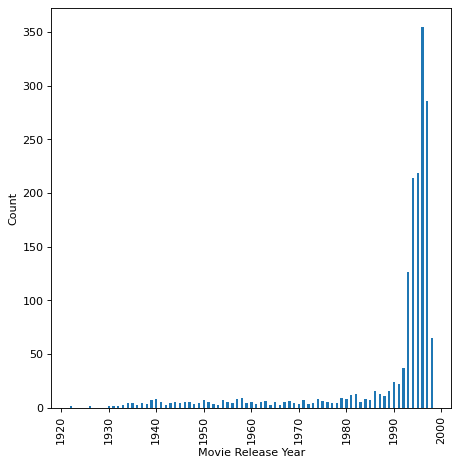

In [ ]:
release_year_dict
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 5), dpi=80)

ax = fig.add_axes([0,0,1,1])
langs = release_year_dict.keys()
cnts = release_year_dict.values()

ax.bar(langs,cnts, width=0.5)
plt.xticks(rotation=90)
plt.xlabel("Movie Release Year")
plt.ylabel("Count")
plt.show()

In [ ]:
df = pd.read_csv('drive/MyDrive/dataset/ml-100k/u.user', sep='|', index_col=False,encoding='latin-1', names=['user id', 'user age', 'gender', 'occupation'])
df = df.set_index('user id')
df

,user age,gender,occupation
user id,,,
1,24,M,technician
2,53,F,other
3,23,M,writer
4,24,M,technician
5,33,F,other
...,...,...,...
939,26,F,student
940,32,M,administrator
941,20,M,student


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user age    943 non-null    int64 
 1   gender      943 non-null    object
 2   occupation  943 non-null    object
dtypes: int64(1), object(2)
memory usage: 29.5+ KB


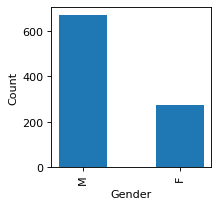

In [ ]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(2, 2), dpi=80)

ax = fig.add_axes([0,0,1,1])
langs = ['M', 'F']
cnts = [(df['gender'] == 'M').sum() , (df['gender'] == 'F').sum()]

ax.bar(langs,cnts, width=0.5)
plt.xticks(rotation=90)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [ ]:
user_age_dict = df['user age'].value_counts().to_dict()

In [ ]:
user_age_dict

{7: 1,
 10: 1,
 11: 1,
 13: 5,
 14: 3,
 15: 6,
 16: 5,
 17: 14,
 18: 18,
 19: 23,
 20: 32,
 21: 27,
 22: 37,
 23: 28,
 24: 33,
 25: 38,
 26: 34,
 27: 35,
 28: 36,
 29: 32,
 30: 39,
 31: 25,
 32: 28,
 33: 26,
 34: 17,
 35: 27,
 36: 21,
 37: 19,
 38: 17,
 39: 22,
 40: 21,
 41: 10,
 42: 21,
 43: 13,
 44: 23,
 45: 15,
 46: 12,
 47: 14,
 48: 20,
 49: 19,
 50: 20,
 51: 20,
 52: 6,
 53: 12,
 54: 4,
 55: 11,
 56: 6,
 57: 9,
 58: 3,
 59: 3,
 60: 9,
 61: 3,
 62: 2,
 63: 3,
 64: 2,
 65: 3,
 66: 1,
 68: 2,
 69: 2,
 70: 3,
 73: 1}

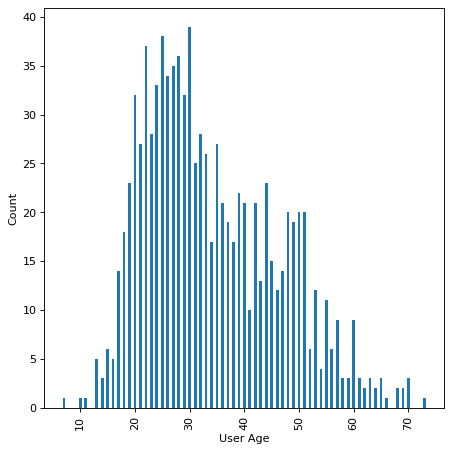

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 5), dpi=80)

ax = fig.add_axes([0,0,1,1])
langs = user_age_dict.keys()
cnts = user_age_dict.values()

ax.bar(langs,cnts, width=0.5)
plt.xticks(rotation=90)
plt.xlabel("User Age")
plt.ylabel("Count")
plt.show()

In [ ]:
df

,user age,gender,occupation
user id,,,
1,24,M,technician
2,53,F,other
3,23,M,writer
4,24,M,technician
5,33,F,other
...,...,...,...
939,26,F,student
940,32,M,administrator
941,20,M,student


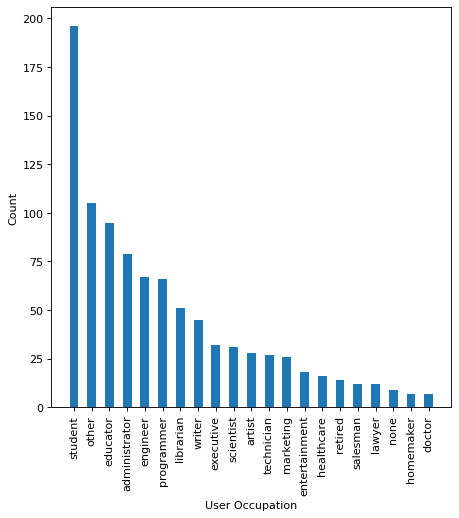

In [ ]:
user_occupation_dict = df['occupation'].value_counts().to_dict()
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 5), dpi=80)

ax = fig.add_axes([0,0,1,1])
langs = user_occupation_dict.keys()
cnts = user_occupation_dict.values()

ax.bar(langs,cnts, width=0.5)
plt.xticks(rotation=90)
plt.xlabel("User Occupation")
plt.ylabel("Count")
plt.show()

In [ ]:
df_movies = pd.read_csv('drive/MyDrive/dataset/ml-100k/u.item', sep='|', index_col=False,encoding='latin-1', names=['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure','Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',  'Horror', 'Musical','Mystery', 'Romance','Sci-Fi','Thriller', 'War', 'Western'])
df_movies = df_movies.set_index('movie id')
df_movies

,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_all_data = pd.read_csv('drive/MyDrive/dataset/ml-100k/u.data', sep='\t', index_col=False,encoding='latin-1', names=['user id', 'movie id', 'rating', 'timestamp'])
df_all_data

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [ ]:
movie_id_rating_dict = defaultdict(list)
genre_rating = defaultdict(float)
for index, row in df_all_data.iterrows():
    movie_id_rating_dict[row['movie id']].append(row['rating'])
# movie_id_rating_dict


In [ ]:
for movie_id in movie_id_rating_dict:
  print(movie_id, movie_id_rating_dict[movie_id])
  movie_id_rating_dict[movie_id] = sum(movie_id_rating_dict[movie_id])/float(len(movie_id_rating_dict[movie_id]))

242 [3, 3, 5, 3, 5, 4, 5, 4, 4, 4, 2, 5, 5, 2, 5, 5, 4, 4, 4, 4, 4, 3, 4, 5, 4, 5, 5, 5, 2, 4, 3, 5, 1, 5, 5, 3, 5, 1, 4, 5, 3, 4, 5, 4, 1, 4, 5, 5, 3, 4, 4, 4, 5, 5, 4, 4, 5, 4, 4, 4, 5, 5, 3, 4, 4, 4, 4, 5, 4, 4, 5, 5, 5, 5, 3, 5, 3, 5, 3, 4, 4, 4, 3, 5, 5, 4, 5, 2, 4, 5, 4, 3, 4, 4, 4, 5, 5, 3, 4, 2, 1, 5, 4, 5, 3, 4, 4, 3, 4, 4, 4, 4, 5, 4, 3, 4, 3]
302 [3, 4, 4, 4, 3, 5, 3, 4, 5, 4, 2, 4, 4, 4, 4, 3, 4, 3, 5, 5, 3, 5, 5, 1, 4, 4, 4, 5, 5, 4, 4, 4, 5, 4, 5, 5, 4, 4, 5, 5, 5, 4, 3, 5, 5, 4, 4, 4, 4, 4, 5, 3, 5, 4, 3, 3, 2, 4, 4, 5, 4, 5, 4, 5, 2, 4, 4, 5, 5, 5, 4, 5, 5, 4, 4, 5, 4, 4, 3, 4, 5, 5, 4, 3, 5, 4, 5, 4, 4, 5, 4, 3, 5, 5, 5, 4, 4, 4, 5, 2, 5, 4, 5, 3, 5, 4, 5, 3, 4, 4, 4, 5, 5, 4, 3, 5, 3, 5, 5, 3, 5, 4, 5, 5, 5, 4, 5, 5, 3, 3, 3, 3, 5, 5, 4, 5, 2, 5, 4, 4, 5, 4, 4, 5, 4, 4, 4, 3, 5, 4, 4, 5, 5, 4, 4, 4, 5, 4, 5, 5, 4, 4, 3, 4, 4, 1, 5, 4, 4, 4, 5, 4, 5, 5, 4, 5, 4, 5, 5, 4, 5, 3, 4, 5, 3, 5, 4, 3, 5, 5, 5, 5, 4, 5, 2, 2, 5, 3, 4, 5, 5, 5, 5, 4, 3, 4, 4, 3, 5, 4, 3, 5, 5, 

In [ ]:
avg_rating_movie_id = defaultdict(float)
arr = []
for movie_id in movie_id_rating_dict:
  print(movie_id, movie_id_rating_dict[movie_id])
  arr.append([movie_id, movie_id_rating_dict[movie_id]])
  # avg_rating_movie_id

242 3.9914529914529915
302 4.161616161616162
377 2.1538461538461537
51 3.45679012345679
346 3.642857142857143
474 4.252577319587629
265 3.8634361233480177
465 3.5647058823529414
451 3.347058823529412
86 3.94
257 3.745874587458746
1014 3.061224489795918
222 3.66027397260274
40 2.8947368421052633
29 2.6666666666666665
785 3.1538461538461537
387 3.3846153846153846
274 3.5
1042 3.142857142857143
1184 2.5
392 3.5441176470588234
486 3.796875
144 3.8724279835390947
118 3.2150170648464163
1 3.8783185840707963
546 3.031496062992126
95 3.8127853881278537
768 3.076923076923077
277 3.464788732394366
234 3.775
246 3.935483870967742
98 4.28974358974359
193 3.917197452229299
88 3.539906103286385
194 4.058091286307054
1081 2.75
603 4.3875598086124405
796 3.0833333333333335
32 3.7901234567901234
16 3.2051282051282053
304 3.5369127516778525
979 3.2
564 2.037037037037037
327 3.3771428571428572
201 3.5168539325842696
1137 3.9655172413793105
241 3.546875
4 3.550239234449761
332 3.4615384615384617
100 4.155

In [ ]:
arr.sort()

In [ ]:
arr
rat = [] 
for i in arr:
  rat.append(i[1])


In [ ]:
df_movies['rating'] = rat

In [ ]:
df_movies['release year'] = pd.DatetimeIndex(df_movies['release date']).year
df_movies

,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating,release year
movie id,,,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.878319,1995.0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.206107,1995.0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.033333,1995.0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3.550239,1995.0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3.302326,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.000000,1998.0
1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,3.000000,1998.0
1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2.000000,1998.0


In [ ]:
x = df_movies.corr()

In [ ]:
x['rating']

video release date         NaN
unknown              -0.037700
Action               -0.058801
Adventure             0.025677
Animation             0.045621
Children's           -0.056959
Comedy               -0.063270
Crime                 0.045467
Documentary           0.034322
Drama                 0.123980
Fantasy              -0.033326
Film-Noir             0.072719
Horror               -0.106473
Musical               0.071337
Mystery               0.064735
Romance               0.089198
Sci-Fi                0.028917
Thriller              0.032505
War                   0.110992
Western               0.017910
rating                1.000000
release year         -0.237705
Name: rating, dtype: float64

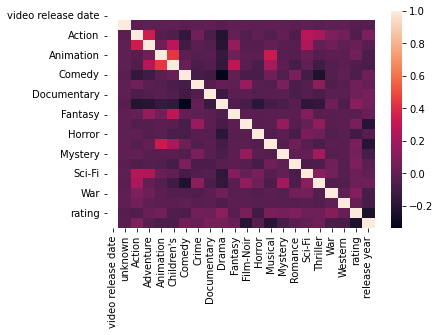

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(x)
plt.show()

In [ ]:
genre_rating = defaultdict(list)
gens = ['unknown', 'Action', 'Adventure','Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',  'Horror', 'Musical','Mystery', 'Romance','Sci-Fi','Thriller', 'War', 'Western']
for index, row in df_movies.iterrows():
  for gen in gens:
    if row[gen] == 1:
      genre_rating[gen].append(row['rating'])

    # movie_id_rating_dict[row['movie id']].append(row['rating'])

In [ ]:
arr = []
for r in genre_rating:
  genre_rating[r] = float(sum(genre_rating[r]))/len(genre_rating[r])
  arr.append([genre_rating[r], r])

In [ ]:
arr.sort()
arr
rats = []
genss = []
for i in arr:
  rats.append(i[0])
  genss.append(i[1])

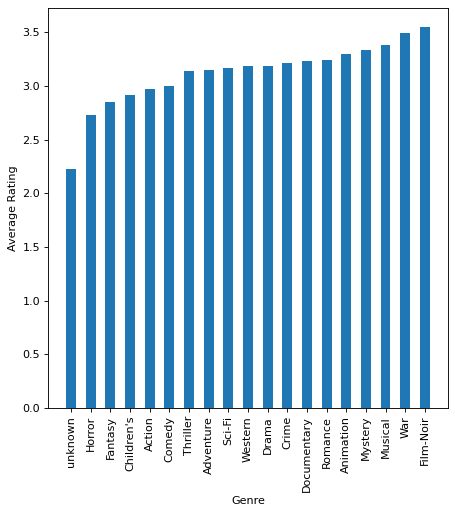

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 5), dpi=80)

ax = fig.add_axes([0,0,1,1])

ax.bar(genss,rats, width=0.5)
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.show()

In [ ]:
all_ratings = []
for index, row in df_all_data.iterrows():
    all_ratings.append(row['rating'])

In [ ]:
rating_freq = defaultdict(int)
for i in all_ratings:
  rating_freq[i] += 1


In [ ]:
rating_freq

defaultdict(int, {1: 6110, 2: 11370, 3: 27145, 4: 34174, 5: 21201})

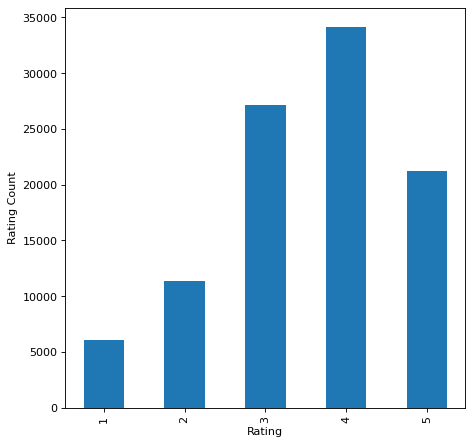

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 5), dpi=80)

ax = fig.add_axes([0,0,1,1])
langs = rating_freq.keys()
cnts = rating_freq.values()

ax.bar(langs,cnts, width=0.5)
plt.xticks(rotation=90)
plt.xlabel("Rating")
plt.ylabel("Rating Count")
plt.show()

In [ ]:
all_ratings = []
release_year_rating_dict = defaultdict(list)
for index, row in df_movies.iterrows():
    release_year_rating_dict[row['release year']].append(row['rating'])
    # all_ratings.append(row['rating'])

In [ ]:
for i in release_year_rating_dict:
  release_year_rating_dict[i] = sum(release_year_rating_dict[i])/float(len(release_year_rating_dict[i]))
  

In [ ]:
release_year_rating_dict

defaultdict(list,
            {1922.0: 3.5555555555555554,
             1930.0: 3.7777777777777777,
             1975.0: 3.521517094017094,
             1983.0: 2.896036824977157,
             nan: 3.4444444444444446,
             1926.0: 3.0,
             1931.0: 4.0,
             1932.0: 3.8333333333333335,
             1933.0: 2.5,
             1934.0: 3.8072530864197534,
             1935.0: 3.4267905393550198,
             1936.0: 3.601851851851852,
             1937.0: 3.8390902872777017,
             1938.0: 3.895750361576601,
             1939.0: 4.009120473837144,
             1940.0: 3.8790317833536325,
             1941.0: 3.783801835963024,
             1942.0: 4.033950617283951,
             1943.0: 2.875,
             1944.0: 3.7948738841024956,
             1945.0: 3.4265151515151517,
             1946.0: 3.052798799374142,
             1947.0: 3.1802325581395348,
             1948.0: 3.3666666666666667,
             1949.0: 3.201388888888889,
             1950.0: 3.2065

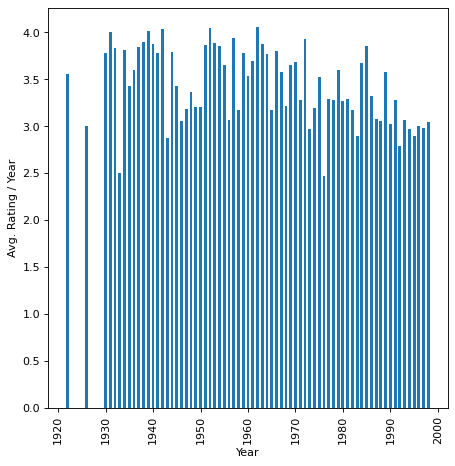

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 5), dpi=80)

ax = fig.add_axes([0,0,1,1])
langs = release_year_rating_dict.keys()
cnts = release_year_rating_dict.values()

ax.bar(langs,cnts, width=0.6)
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Avg. Rating / Year")
plt.show()

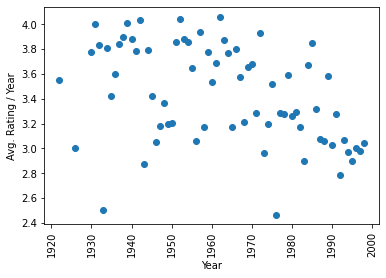

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = release_year_rating_dict.keys()
y = release_year_rating_dict.values()
plt.xlabel("Year")
plt.ylabel("Avg. Rating / Year")
plt.xticks(rotation=90)

plt.scatter(x, y)
plt.show()